Insert Markdown Here
https://datahub.io/sports-data/english-premier-league#data


In [1484]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.glyphs import MultiLine
# Bokeh Library
from bokeh.models import HoverTool
%matplotlib inline

In [1485]:
#Load data from csv
season_one = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-0910_csv.csv", parse_dates=['Date'])
season_two = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1011_csv.csv", parse_dates=['Date'])
season_three = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1112_csv.csv", parse_dates=['Date'])
season_four= pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1213_csv.csv", parse_dates=['Date'])
season_five = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1314_csv.csv", parse_dates=['Date'])
season_six = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1415_csv.csv", parse_dates=['Date'])
season_seven = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1516_csv.csv", parse_dates=['Date'])
season_eight = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1617_csv.csv", parse_dates=['Date'])
season_nine = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1718_csv.csv", parse_dates=['Date'])
season_ten = pd.read_csv(r"C:\Users\Ajibola Vincent\Downloads\EPL Visualization Project\season-1819_csv.csv", parse_dates=['Date'])

In [1486]:
# Merge all 10 dataframes into a single dataframe
allseasons = pd.concat([season_one,season_two,season_three,season_four,season_five,season_six,season_seven,season_eight,
                       season_nine, season_ten])

In [1487]:
# Select games where Arsenal played home or away : 38 per season i.e 380 games in total
allseasonsArsenal = allseasons[(allseasons['AwayTeam'] == 'Arsenal') | (allseasons['HomeTeam'] == 'Arsenal')]

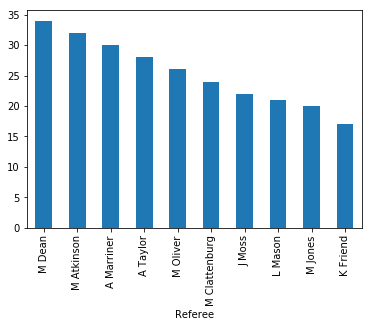

In [1488]:
#Quick plot showing the referees who have officiated who have officiated Arsenal games
allseasonsArsenal.groupby(['Referee']).size().nlargest(10).plot(kind='bar')

In [1489]:
# Check the result type: W for Win , D for draw and L for Loss
def check_results(row):
    result = ""
    res = row['FTR']
    team1 = row['HomeTeam']
    team2 = row['AwayTeam']
    if (team1 == 'Arsenal') & (res == 'H'):
        result = 'W'
    elif (team1 == 'Arsenal') & (res == 'A'):
        result = 'L'
    elif (team2 == 'Arsenal') & (res == 'A'):
        result = 'W'
    elif (team2 == 'Arsenal') & (res == 'H'):
        result = 'L'
    else:
        result = 'D'       

    return result

In [1490]:
# Function to assign points to the result: 1 Point for Draw/Tie, 0 Points for a loass and 3 points for a win
def check_points(row):
    points = 0
    result = row['Results']
    if result == 'D':
        points = 1
    elif result == 'W':
        points = 3
    else:
        points = 0    
    return points

In [1491]:
# Assign season to date of match. Season  starts in August and ends in May 
def check_season(row):
    season = ""
    date = row['Date']
    if (date >= pd.to_datetime('2009-08-15')) & (date <= pd.to_datetime('2010-05-21')):
        season += "09-10"
    elif (date >= pd.to_datetime('2010-08-10')) & (date <= pd.to_datetime('2011-05-23')):
        season += "10-11"
    elif (date >= pd.to_datetime('2011-08-13')) & (date <= pd.to_datetime('2012-05-23')):
        season += "11-12"
    elif (date >= pd.to_datetime("2012-08-18")) & (date <= pd.to_datetime("2013-05-19")): 
        season += "12-13" 
    elif (date >= pd.to_datetime("2013-08-17")) & (date <= pd.to_datetime("2014-05-11")): 
        season += "13-14" 
    elif (date >= pd.to_datetime("2014-08-16")) & (date <= pd.to_datetime("2015-05-24")): 
        season += "14-15" 
    elif (date >= pd.to_datetime("2015-08-08")) & (date <= pd.to_datetime("2016-05-15")): 
        season += "15-16" 
    elif (date >= pd.to_datetime("2016-08-13")) & (date <= pd.to_datetime("2017-05-21")): 
        season += "16-17" 
    elif (date >= pd.to_datetime("2017-08-11")) & (date <= pd.to_datetime("2018-05-13")):
        season += "17-18"
    elif (date >= pd.to_datetime("2018-08-05")) & (date <= pd.to_datetime("2019-05-20")):
        season += "18-19"
    else:
        season = season
    return season

In [1644]:
# Create new column for results
allseasonsArsenal.loc[:, 'Results'] = allseasonsArsenal.apply(check_results, axis = 1)

In [1645]:
# Create new column for points
allseasonsArsenal.loc[:, 'Points'] = allseasonsArsenal.apply(check_points, axis = 1)

In [1646]:
# Create new column for Season
allseasonsArsenal.loc[:, 'Season'] = allseasonsArsenal.apply(check_season, axis = 1)

In [1647]:
# Create new column for Progress(The Sum of points accrued per season)
allseasonsArsenal.loc[:, 'Progress'] = allseasonsArsenal.groupby('Season')['Points'].cumsum() 

In [1648]:
# Function to calculate the results by the referee who officiated
def win_percent_by_referee(df):
    temp = pd.DataFrame({'count' : df.groupby( [ 'Referee', 'Results'] )['Referee'].size()}).reset_index()
    temp['count'].astype(int)
    temp['Percent'] = round(temp.groupby('Referee')['count'].transform(lambda x: x/sum(x) * 100))
    temp = pd.pivot_table(temp, values='Percent', index=['Referee'],columns=['Results'], aggfunc=np.sum)
    temp.columns = ['Draw%', 'Loss%', 'Win%']
    temp.fillna(0,inplace=True)
    print (str(len(df['Referee'].unique())) + " referees officiated matches in the " + 
           str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    return temp

In [1649]:
# Find win, draw, loss, goald for, goals against, goal difference and points by season
results = pd.DataFrame({'Count' : allseasonsArsenal.groupby(['Season', 'Results']).size()}).reset_index()
results = pd.pivot_table(results, values='Count', index=['Season'],columns=['Results'], aggfunc=np.sum)

In [1650]:
# Calculate the total results against all teams per season
def results_by_team(df):
    away = df.groupby(['AwayTeam','HomeTeam','Results']).size().to_frame('size')
    away = pd.pivot_table(away, values='size', index=['HomeTeam'],columns=['Results'], aggfunc=np.sum)
    away.fillna(0,inplace=True)
    home = df.groupby(['HomeTeam','AwayTeam','Results']).size().to_frame('size')
    home = pd.pivot_table(home, values='size', index=['AwayTeam'],columns=['Results'], aggfunc=np.sum)
    home.fillna(0,inplace=True)
    temp = away.add(home, fill_value=0)
    temp['Win%'] = round((temp['W']/ temp.sum(axis = 1)) * 100, 1)
    temp.drop(['Arsenal'], inplace=True)
    print ("Arsenal played against " + str(len(allseasonsArsenal['HomeTeam'].unique())) + " teams in the " + 
       str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    print ("Arsenal won "+str(allseasonsArsenal.groupby(['Results']).size().to_frame('size').loc['W'][0]) + " games, drew "
           + str(allseasonsArsenal.groupby(['Results']).size().to_frame('size').loc['D'][0])
           +" games and lost " + str(allseasonsArsenal.groupby(['Results']).size().to_frame('size').loc['L'][0])
           + " games in the " + str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    return temp

In [1651]:
# Select Away Games
allseasonsAway = allseasonsArsenal[allseasonsArsenal['AwayTeam'] == 'Arsenal']

# Select Home Games
allseasonsHome = allseasonsArsenal[allseasonsArsenal['HomeTeam'] == 'Arsenal']

In [1672]:
# Goals conceded at home by season
allseasonsHome.loc[:, 'HomeConceeded'] = allseasonsHome.groupby('Season')['FTAG'].cumsum() 
homeGoalsConceeded = allseasonsHome.groupby(['Season'])['HomeConceeded'].tail(1)

In [1673]:
# Goals conceded away by season
allseasonsAway.loc[:, 'AwayConceeded'] = allseasonsAway.groupby('Season')['FTHG'].cumsum() 
awayGoalsConceeded = allseasonsAway.groupby(['Season'])['AwayConceeded'].tail(1)

In [1674]:
# Goals scored away by season
allseasonsAway.loc[:, 'AwayScored'] = allseasonsAway.groupby('Season')['FTAG'].cumsum() 
awayGoalsScored = allseasonsAway.groupby(['Season'])['AwayScored'].tail(1)

In [1675]:
# Goals scored at home by season
allseasonsHome.loc[:, 'HomeScored'] = allseasonsHome.groupby('Season')['FTHG'].cumsum()
homeGoalsScored = allseasonsHome.groupby(['Season'])['HomeScored'].tail(1)

In [1692]:
# Points amassed by season
arsenalPoints = allseasonsArsenal.groupby(['Season'])['Progress'].tail(1)

In [1693]:
positions = ['3rd','4th','3rd','4th','4th','3rd','2nd','5th','6th','5th']

In [1694]:
# Summary dataframe for Totteham Hotspurs
spurs = allseasons[(allseasons['AwayTeam'] == 'Arsenal') | (allseasons['HomeTeam'] == 'Arsenal')]
spurs.loc[:, 'Results'] = spurs.apply(check_results, axis = 1)
spurs.loc[:, 'Points'] = spurs.apply(check_points, axis = 1)
spurs.loc[:, 'Season'] = spurs.apply(check_season, axis = 1)
spurs.loc[:, 'Progress'] = spurs.groupby('Season')['Points'].cumsum() 
spurs_points = allseasonsArsenal.groupby(['Season'])['Progress'].tail(1)
spurs_positions = ['4th','5th','4th','5th', '6th','5th' ,'3rd','2nd','3rd','4th']
spurs_combined= pd.concat([pd.Series(spurs['Season'].unique()),arsenalPoints.reset_index(drop = True),
                          pd.Series(spurs_positions)] ,axis=1)
spurs_combined.columns = ['Season','Points', 'Position']

In [1695]:
# Combine the extract series and group by results into a single dataframe
arsenal_combined= pd.concat([pd.Series(allseasonsArsenal['Season'].unique()),
                           homeGoalsScored.reset_index(drop = True) + awayGoalsScored.reset_index(drop = True),
                           homeGoalsConceeded.reset_index(drop = True) + awayGoalsConceeded.reset_index(drop = True),
                           arsenalPoints.reset_index(drop = True),pd.Series(positions),
                           spurs_combined['Points'], spurs_combined['Position']] ,axis=1)
arsenal_combined.columns = ['Season','For','Against','Points', 'Position', 'SpursPoints','SpursPosition']

In [1696]:
# Create a ColumnDataSource for Points, HomeGoals, AwayGoals, HomeConceeded, AwayConceeded
arsenal_combined_cds = ColumnDataSource(arsenal_combined)
results_team_cds = ColumnDataSource(results_by_team(allseasonsArsenal))
results_referee_cds = ColumnDataSource(win_percent_by_referee(allseasonsArsenal))
spurs_cds = ColumnDataSource(spurs_combined)

Arsenal played against 36 teams in the 10 seasons
Arsenal won 213 games, drew 80 games and lost 87 games in the 10 seasons
27 referees officiated matches in the 10 seasons


In [1697]:
# Create and configure the figure
goals_fig = figure(x_range = arsenal_combined_cds.data['Season'],plot_height=300, plot_width=500,
             title='Arsenal in the EPL',
             x_axis_label='Season', y_axis_label='Goals',
             toolbar_location=None)

goals_fig.line('Season', 'For', 
         color='#CE1141', legend='Scored', 
         source=seasonsCombined_cds)
goals_fig.line('Season', 'Against', 
         color='#006BB6', legend='Conceeded', 
         source=seasonsCombined_cds)

# Move the legend to the upper left corner
goals_fig.legend.location = 'top_right'

#Implement hide on click
goals_fig.legend.click_policy="hide"

In [1698]:
points_fig = figure(x_range = arsenal_combined_cds.data['Season'],plot_height=300, plot_width=500,
             title='Arsenal vs Totteham in the EPL',x_axis_label='Season', y_axis_label='Points',
             toolbar_location=None)
tooltips = [('TotalPoints','@Points'),('FinalPosition', '@Position')]
points_fig.line('Season', 'Points', color='#CE1141', legend='Arsenal', 
               source=arsenal_combined_cds)                               
#points_fig.add_tools(HoverTool(renderers=[r1], tooltips=tooltips))

points_fig.line('Season', 'SpursPoints', color='#006BB6', legend='Spurs', 
              source=arsenal_combined_cds)
#points_fig.add_tools(HoverTool(renderers=[r2], tooltips=tooltips))

# Move the legend to the upper left corner
points_fig.legend.location = 'top_right'

#Implement hide on click
points_fig.legend.click_policy="hide"

In [1699]:
# Plot graph for teams Arsenal have met in all 10 seasons
'''results_team_fig = Bar(df, label='yr', values='mpg', agg='median', group='origin',
                  title="Something", legend='top_right')'''

'results_team_fig = Bar(df, label=\'yr\', values=\'mpg\', agg=\'median\', group=\'origin\',\n                  title="Something", legend=\'top_right\')'

In [1700]:
# Output to file
output_file('EPL Season 2011-2019.html', 
            title="Let's See")

#Increase the plot widths
points_fig.plot_width = 800

# Create two panels, one for each conference
goals_panel = Panel(child=goals_fig, title='Goals by Season')
#points_panel = Panel(child=points_fig, title='Points by Season')
# = Panel(child=results_fig, title='Results by Team')

# Assign the panels to Tabs
tabs = Tabs(tabs=[goals_panel])

# Show the tabbed layout
show(tabs)

RuntimeError: Models must be owned by only a single document, UnionRenderers(id='15461', ...) is already in a doc